In [137]:
import numpy as np
import pandas as pd
import warnings
import ydata_profiling
import csv
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from ydata_profiling import ProfileReport
from collections import Counter
from sklearn.cluster import MiniBatchKMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', None)
plt.rcParams['figure.figsize'] = [15, 6]
%matplotlib inline

In [34]:
def read_csv(file_path):
    rows = []
    with open(file_path, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            rows.append(row)
    return rows

In [35]:
# imported the excel file
df_dict = pd.read_excel('loanDict.xlsx')
df_dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [36]:
df = pd.read_csv('loanStats.csv')
df.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000,60 months,17.19%,499.10,C,C5,Front desk supervisor,6 years,RENT,47000.0,Source Verified,19-Mar,Issued,n,NaN,NaN,debt_consolidation,Debt consolidation,958xx,CA,14.02,0,6-Sep,1,50.0,NaN,15,0,10687,19.70%,53,w,20000.0,20000.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,19-Apr,19-Apr,0,50.0,1,Individual,NaN,NaN,NaN,0,0,31546,3,2,1,2,10.0,20859,97.0,4,9,5909,42.0,54300,6,1,3,11,2103.0,23647.0,30.0,0,0,150.0,100,1,1,0,5.0,NaN,3.0,50.0,3,3,4,8,19,19,13,33,4,15,0.0,0,0,5,98.0,12.5,0,0,75824,31546,33800,21524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,21225,21225,21225,60 months,14.74%,502.05,C,C2,ceo,10+ years,MORTGAGE,225000.0,Not Verified,19-Mar,Issued,n,NaN,NaN,credit_card,Credit card refinancing,956xx,CA,16.80,0,Sep-94,2,NaN,110.0,14,1,95868,87.70%,22,w,21225.0,21225.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,19-Apr,19-Apr,0,NaN,1,Individual,NaN,NaN,NaN,0,0,694793,1,5,2,4,3.0,113558,76.0,0,1,17353,84.0,109300,1,0,4,5,49628.0,12635.0,76.4,0,0,126.0,294,24,3,4,30.0,NaN,1.0,NaN,0,4,6,4,4,11,7,7,6,14,0.0,0,0,2,100.0,50.0,1,0,747075,209426,53500,128175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97%,180.69,D,D1,NaN,NaN,MORTGAGE,62000.0,Not Verified,19-Mar,Issued,n,NaN,NaN,home_improvement,Home improvement,320xx,FL,19.82,1,Nov-87,0,4.0,NaN,8,0,7285,77.50%,18,w,5000.0,5000.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,19-Apr,19-Apr,0,4.0,1,Individual,NaN,NaN,NaN,0,0,206639,0,1,0,0,33.0,24330,NaN,1,3,2318,78.0,9400,0,0,0,3,25830.0,2115.0,77.5,0,0,187.0,376,9,9,2,9.0,NaN,NaN,4.0,3,6,6,6,6,7,6

In [37]:
df.columns.to_list()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [38]:
columns = [
    "loan_amnt", "int_rate", "installment", "home_ownership",
    "annual_inc", "verification_status", "issue_d", "loan_status",
    "pymnt_plan", "dti", "delinq_2yrs", "inq_last_6mths",
    "open_acc", "pub_rec", "revol_bal", "total_acc",
    "initial_list_status", "out_prncp", "out_prncp_inv", "total_pymnt",
    "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
    "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "next_pymnt_d",
    "collections_12_mths_ex_med", "policy_code", "application_type", "acc_now_delinq",
    "tot_coll_amt", "tot_cur_bal", "open_acc_6m", "open_act_il",
    "open_il_12m", "open_il_24m", "mths_since_rcnt_il", "total_bal_il",
    "il_util", "open_rv_12m", "open_rv_24m", "max_bal_bc",
    "all_util", "total_rev_hi_lim", "inq_fi", "total_cu_tl",
    "inq_last_12m", "acc_open_past_24mths", "avg_cur_bal", "bc_open_to_buy",
    "bc_util", "chargeoff_within_12_mths", "delinq_amnt", "mo_sin_old_il_acct",
    "mo_sin_old_rev_tl_op", "mo_sin_rcnt_rev_tl_op", "mo_sin_rcnt_tl", "mort_acc",
    "mths_since_recent_bc", "mths_since_recent_inq", "num_accts_ever_120_pd", "num_actv_bc_tl",
    "num_actv_rev_tl", "num_bc_sats", "num_bc_tl", "num_il_tl",
    "num_op_rev_tl", "num_rev_accts", "num_rev_tl_bal_gt_0",
    "num_sats", "num_tl_120dpd_2m", "num_tl_30dpd", "num_tl_90g_dpd_24m",
    "num_tl_op_past_12m", "pct_tl_nvr_dlq", "percent_bc_gt_75", "pub_rec_bankruptcies",
    "tax_liens", "tot_hi_cred_lim", "total_bal_ex_mort", "total_bc_limit",
    "total_il_high_credit_limit", "hardship_flag", "debt_settlement_flag"
]

In [39]:
target = ['loan_status']

In [40]:
df = df.loc[:, columns].copy()

In [41]:
#df.head()
#df.shape
df_null = (df.isnull().sum().sum())/(df.shape[0]*df.shape[1])
df_null

0.004988917426028217

In [42]:
df.dtypes.value_counts()

int64      52
float64    23
object     11
dtype: int64

<AxesSubplot: >

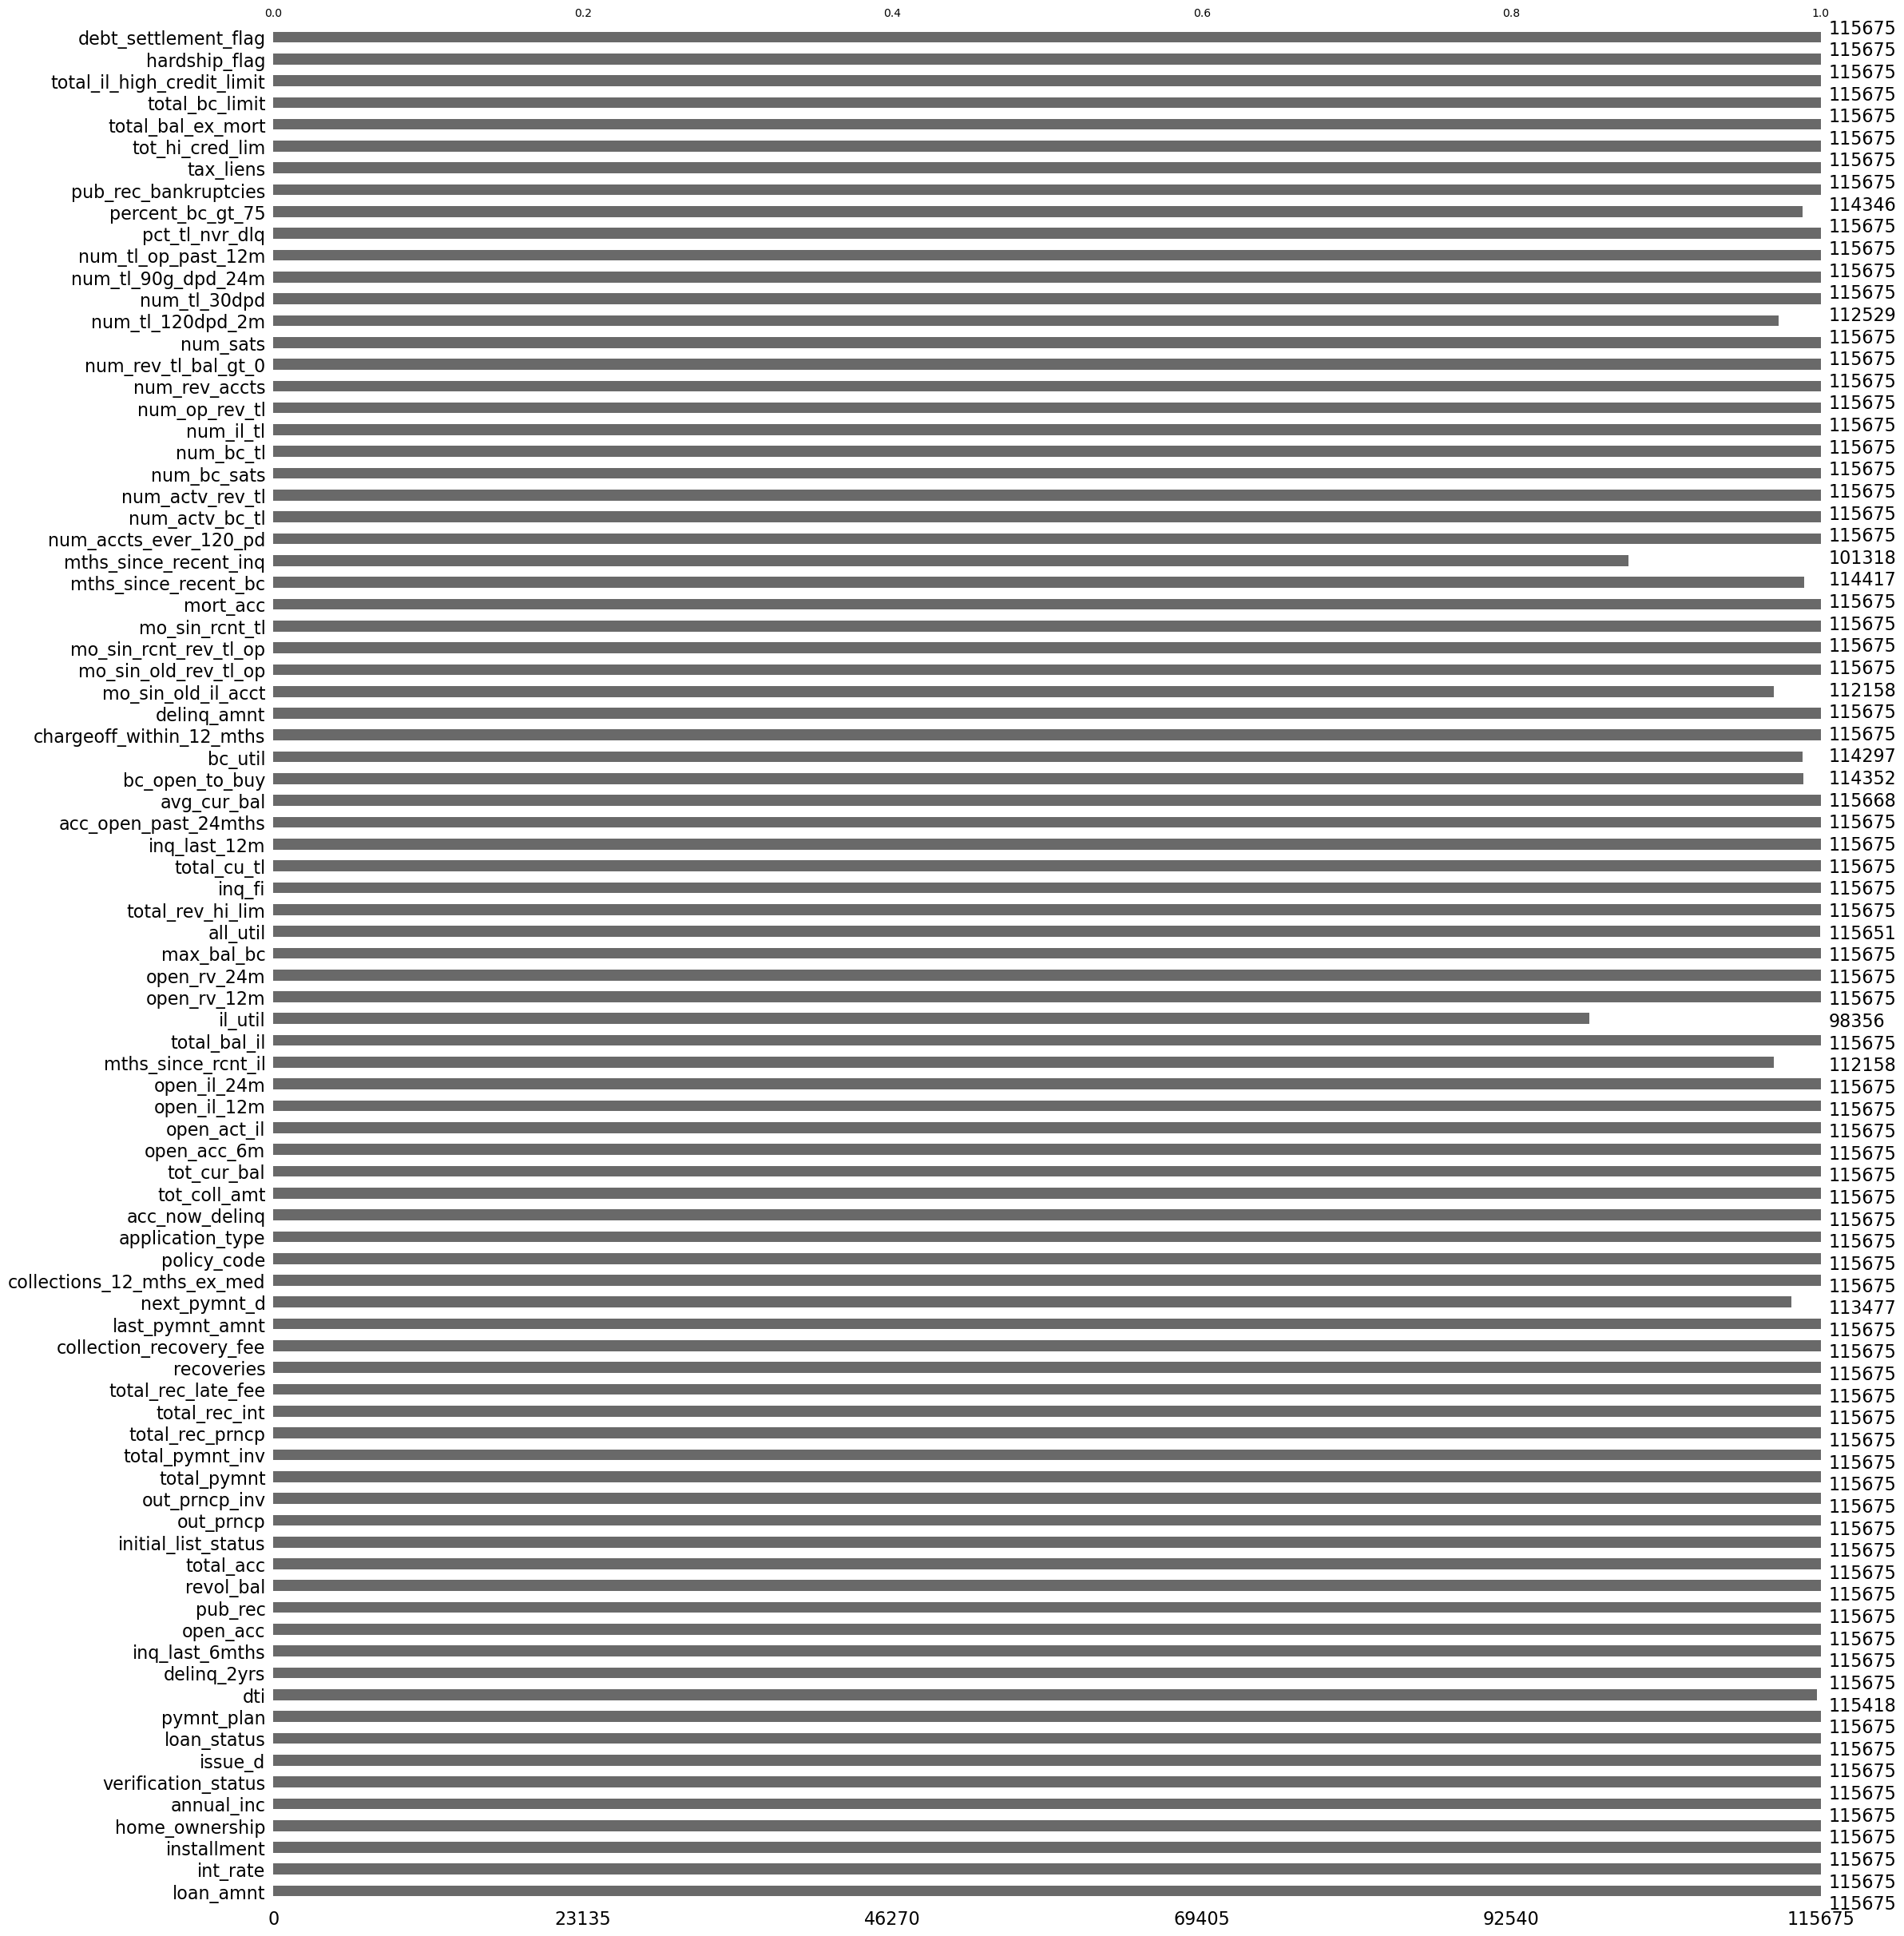

In [43]:
#msno.dendrogram(df)
msno.bar(df)

In [44]:
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

In [45]:
# Drop the null rows
df = df.dropna()

In [46]:
df.head().transpose()

,0,1,3,4,6
loan_amnt,20000,21225,20000,12000,25000
int_rate,17.19%,14.74%,8.19%,15.57%,7.02%
installment,499.1,502.05,628.49,289.09,772.16
home_ownership,RENT,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE
annual_inc,47000.0,225000.0,200000.0,49000.0,305000.0
verification_status,Source Verified,Not Verified,Not Verified,Source Verified,Not Verified
issue_d,19-Mar,19-Mar,19-Mar,19-Mar,19-Mar
loan_status,Issued,Issued,Issued,Issued,Issued
pymnt_plan,n,n,n,n,n
dti,14.02,16.8,22.66,13.47,8.16


In [47]:
#msno.heatmap(df.sample(frac=0.5))

In [48]:
# Instead of checking every column of 53 columns like above, here we are running a for loop on top of 'object' columns and take a decison based on the output of this cell.
for x in df.columns[df.dtypes == 'object']:
    print(df[x].value_counts())
    print('************************')

8.19%     8246
8.81%     5449
6.46%     4458
10.33%    4296
11.80%    4243
7.56%     3827
7.02%     3697
12.98%    3027
10.72%    2938
13.56%    2743
17.97%    2676
15.02%    2484
14.47%    2437
11.31%    2310
12.40%    2282
16.91%    2199
16.14%    2184
20.00%    2167
13.08%    1821
13.90%    1708
11.02%    1635
14.74%    1615
15.57%    1564
18.94%    1507
16.40%    1439
19.92%    1387
17.19%    1347
11.71%    1291
20.89%    1077
23.40%     844
22.50%     715
22.35%     563
28.80%     475
27.27%     474
25.34%     353
25.00%     346
26.31%     297
24.37%     243
29.00%      73
28.90%      22
28.97%      18
28.95%      16
28.92%      13
29.35%       7
30.84%       6
30.79%       4
29.69%       4
6.00%        3
30.75%       2
30.17%       2
28.72%       2
30.65%       1
Name: int_rate, dtype: int64
************************
MORTGAGE    43621
RENT        29497
OWN          8752
ANY           667
Name: home_ownership, dtype: int64
************************
Not Verified       38974
Source Ve

In [49]:
# Remove the `Issued` loan status
issued_mask = df['loan_status'] != 'Issued'
df = df.loc[issued_mask]

In [50]:
# convert interest rate to numerical
df['int_rate'] = df['int_rate'].str.replace('%', '')
df['int_rate'] = df['int_rate'].astype('float') / 100

In [51]:
x = {'Current': 'low_risk'}   
df = df.replace(x)

In [52]:
x = dict.fromkeys(['Late (31-120 days)', 'Late (16-30 days)', 'Default', 'In Grace Period'], 'high_risk')    
df = df.replace(x)

In [53]:
df.reset_index(inplace=True, drop=True)
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,next_pymnt_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500,0.1719,375.35,RENT,66000.0,Source Verified,19-Mar,low_risk,n,27.24,0,0,8,0,1609,14,w,10204.87,10204.87,355.29,355.29,295.13,60.16,0.0,0,0,375.35,19-May,0,1,Individual,0,178,38199,3,4,2,4,3.0,36590,59.0,1,2,1553,58.0,3700,1,0,4,6,4775.0,447.0,77.7,0,0,93.0,96,3,3,0,20.0,1.0,0,1,2,1,1,10,3,3,2,8,0.0,0,0,3,85.7,100.0,0,0,65687,38199,2000,61987,N,N
1,25000,0.2000,929.09,MORTGAGE,105000.0,Verified,19-Mar,low_risk,n,20.23,0,0,17,1,18368,34,w,24293.13,24293.13,873.53,873.53,706.87,166.66,0.0,0,0,929.09,19-May,0,1,Individual,0,165,228119,3,3,2,3,4.0,42273,86.0,4,8,5197,61.0,50400,4,9,3,13,13419.0,29502.0,28.4,0,0,87.0,286,1,1,2,1.0,11.0,3,7,11,8,13,14,13,18,11,17,0.0,0,0,6,91.2,50.0,1,0,271427,60641,41200,49197,N,N
2,20000,0.2000,529.88,MORTGAGE,56000.0,Verified,19-Mar,low_risk,n,24.26,0,0,8,0,13247,21,w,19636.79,19636.79,485.44,485.44,363.21,122.23,0.0,0,0,529.88,19-May,0,1,Individual,0,0,45684,2,3,2,3,4.0,32437,75.0,2,3,2810,75.0,17500,0,4,1,6,5711.0,2839.0,62.1,0,0,159.0,156,7,4,0,7.0,7.0,6,2,5,2,7,8,5,13,5,8,0.0,0,0,4,66.7,50.0,0,0,60644,45684,7500,43144,N,N
3,10000,0.1640,353.55,RENT,92000.0,Verified,19-Mar,low_risk,n,31.44,0,1,10,1,17996,23,w,9719.34,9719.34,335.33,335.33,280.66,54.67,0.0,0,0,353.55,19-May,0,1,Individual,0,0,68784,0,4,1,3,9.0,50788,66.0,0,1,6360,69.0,23000,3,5,4,4,6878.0,4899.0,75.1,0,0,100.0,89,24,9,0,34.0,0.0,0,4,6,4,4,17,6,6,6,10,0.0,0,0,1,100.0,50.0,1,0,99506,68784,19700,76506,N,N
4,22000,0.1474,520.39,MORTGAGE,52000.0,Not Verified,19-Mar,low_risk,n,18.76,0,1,14,0,9091,28,w,21614.73,21614.73,484.36,484.36,385.27,99.09,0.0,0,0,520.39,19-May,0,1,Individual,0,0,177745,0,1,0,2,14.0,16828,84.0,1,1,3600,41.0,43100,2,0,2,4,13673.0,19699.0,28.6,0,0,67.0,138,11,11,4,11.0,0.0,0,4,6,7,11,6,12,18,6,14,0.0,0,0,1,100.0,0.0,0,0,219750,25919,27600,20000,N,N


In [54]:
# Create our features
X = df.drop(columns='loan_status')
X = pd.get_dummies(X)

# Create our target
y = df.loc[:, target].copy()

In [55]:
X.describe

<bound method NDFrame.describe of        loan_amnt  int_rate  installment  annual_inc    dti  delinq_2yrs  \
0          10500    0.1719       375.35     66000.0  27.24            0   
1          25000    0.2000       929.09    105000.0  20.23            0   
2          20000    0.2000       529.88     56000.0  24.26            0   
3          10000    0.1640       353.55     92000.0  31.44            0   
4          22000    0.1474       520.39     52000.0  18.76            0   
...          ...       ...          ...         ...    ...          ...   
68812      10000    0.1502       346.76     26000.0   9.60            0   
68813      12000    0.2727       368.37     63000.0  29.07            0   
68814       5000    0.1992       185.62     52000.0  14.86            0   
68815      40000    0.0646      1225.24    520000.0   9.96            0   
68816      16000    0.1131       350.36     72000.0   7.02            2   

       inq_last_6mths  open_acc  pub_rec  revol_bal  total_acc  o

In [56]:
# Check the balance of our target values
y['loan_status'].value_counts()

low_risk     68470
high_risk      347
Name: loan_status, dtype: int64

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [60]:
scaler = StandardScaler()

In [61]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
X_scaler = scaler.fit(X_train)

In [62]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [64]:
# Resample the training data with the BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brf.fit(X_train_scaled, y_train)

BalancedRandomForestClassifier(random_state=1)

In [65]:
# Calculated the balanced accuracy score
y_pred = brf.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred)

0.7887512850910909

In [66]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[   71,    30],
       [ 2146, 14958]], dtype=int64)

In [67]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.03      0.70      0.87      0.06      0.78      0.60       101
   low_risk       1.00      0.87      0.70      0.93      0.78      0.63     17104

avg / total       0.99      0.87      0.70      0.93      0.78      0.63     17205



In [68]:
# List the features sorted in descending order by feature importance
importances = brf.feature_importances_ 
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print(f"{X.columns.values[f]}: ({importances[indices[f]]})")

loan_amnt: (0.07876809003486353)
int_rate: (0.05883806887524815)
installment: (0.05625613759225244)
annual_inc: (0.05355513093134745)
dti: (0.0500331813446525)
delinq_2yrs: (0.02966959508700077)
inq_last_6mths: (0.021129125328012987)
open_acc: (0.01980242888931366)
pub_rec: (0.01747062730041245)
revol_bal: (0.016858293184471483)
total_acc: (0.01641297102011915)
out_prncp: (0.015220714904737209)
out_prncp_inv: (0.015115240704562424)
total_pymnt: (0.014926655663448373)
total_pymnt_inv: (0.014899352873994727)
total_rec_prncp: (0.014881069023035237)
total_rec_int: (0.014859446582326507)
total_rec_late_fee: (0.014832564501144122)
recoveries: (0.014613819728800227)
collection_recovery_fee: (0.014487685026878092)
last_pymnt_amnt: (0.013921085423763812)
collections_12_mths_ex_med: (0.013534131593418711)
policy_code: (0.013364759441576994)
acc_now_delinq: (0.01332289882475225)
tot_coll_amt: (0.013265926832893358)
tot_cur_bal: (0.01311545089813887)
open_acc_6m: (0.01304530062898567)
open_act_il:

In [70]:
# Train the Classifier
eec = EasyEnsembleClassifier(n_estimators=100, random_state=1)
eec.fit(X_train_scaled, y_train)

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [71]:
# Calculated the balanced accuracy score
y_pred = eec.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred)

0.931601605553446

In [72]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[   93,     8],
       [  985, 16119]], dtype=int64)

In [73]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.09      0.92      0.94      0.16      0.93      0.87       101
   low_risk       1.00      0.94      0.92      0.97      0.93      0.87     17104

avg / total       0.99      0.94      0.92      0.97      0.93      0.87     17205



**Resampling Techniques**

In [101]:
df = pd.read_csv('loanStats.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000,60 months,17.19%,499.10,C,C5,Front desk supervisor,6 years,RENT,47000.0,Source Verified,19-Mar,Issued,n,NaN,NaN,debt_consolidation,Debt consolidation,958xx,CA,14.02,0,6-Sep,1,50.0,NaN,15,0,10687,19.70%,53,w,20000.0,20000.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,19-Apr,19-Apr,0,50.0,1,Individual,NaN,NaN,NaN,0,0,31546,3,2,1,2,10.0,20859,97.0,4,9,5909,42.0,54300,6,1,3,11,2103.0,23647.0,30.0,0,0,150.0,100,1,1,0,5.0,NaN,3.0,50.0,3,3,4,8,19,19,13,33,4,15,0.0,0,0,5,98.0,12.5,0,0,75824,31546,33800,21524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,21225,21225,21225,60 months,14.74%,502.05,C,C2,ceo,10+ years,MORTGAGE,225000.0,Not Verified,19-Mar,Issued,n,NaN,NaN,credit_card,Credit card refinancing,956xx,CA,16.80,0,Sep-94,2,NaN,110.0,14,1,95868,87.70%,22,w,21225.0,21225.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,19-Apr,19-Apr,0,NaN,1,Individual,NaN,NaN,NaN,0,0,694793,1,5,2,4,3.0,113558,76.0,0,1,17353,84.0,109300,1,0,4,5,49628.0,12635.0,76.4,0,0,126.0,294,24,3,4,30.0,NaN,1.0,NaN,0,4,6,4,4,11,7,7,6,14,0.0,0,0,2,100.0,50.0,1,0,747075,209426,53500,128175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97%,180.69,D,D1,NaN,NaN,MORTGAGE,62000.0,Not Verified,19-Mar,Issued,n,NaN,NaN,home_improvement,Home improvement,320xx,FL,19.82,1,Nov-87,0,4.0,NaN,8,0,7285,77.50%,18,w,5000.0,5000.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,19-Apr,19-Apr,0,4.0,1,Individual,NaN,NaN,NaN,0,0,206639,0,1,0,0,33.0,24330,NaN,1,3,2318,78.0,9400,0,0,0,3,25830.0,2115.0,77.5,0,0,187.0,376,9,9,2,9.0,NaN,NaN,4.0,3,6,6,6,6,7,6

In [102]:
columns = [
    "loan_amnt", "int_rate", "installment", "home_ownership",
    "annual_inc", "verification_status", "issue_d", "loan_status",
    "pymnt_plan", "dti", "delinq_2yrs", "inq_last_6mths",
    "open_acc", "pub_rec", "revol_bal", "total_acc",
    "initial_list_status", "out_prncp", "out_prncp_inv", "total_pymnt",
    "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
    "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "next_pymnt_d",
    "collections_12_mths_ex_med", "policy_code", "application_type", "acc_now_delinq",
    "tot_coll_amt", "tot_cur_bal", "open_acc_6m", "open_act_il",
    "open_il_12m", "open_il_24m", "mths_since_rcnt_il", "total_bal_il",
    "il_util", "open_rv_12m", "open_rv_24m", "max_bal_bc",
    "all_util", "total_rev_hi_lim", "inq_fi", "total_cu_tl",
    "inq_last_12m", "acc_open_past_24mths", "avg_cur_bal", "bc_open_to_buy",
    "bc_util", "chargeoff_within_12_mths", "delinq_amnt", "mo_sin_old_il_acct",
    "mo_sin_old_rev_tl_op", "mo_sin_rcnt_rev_tl_op", "mo_sin_rcnt_tl", "mort_acc",
    "mths_since_recent_bc", "mths_since_recent_inq", "num_accts_ever_120_pd", "num_actv_bc_tl",
    "num_actv_rev_tl", "num_bc_sats", "num_bc_tl", "num_il_tl",
    "num_op_rev_tl", "num_rev_accts", "num_rev_tl_bal_gt_0",
    "num_sats", "num_tl_120dpd_2m", "num_tl_30dpd", "num_tl_90g_dpd_24m",
    "num_tl_op_past_12m", "pct_tl_nvr_dlq", "percent_bc_gt_75", "pub_rec_bankruptcies",
    "tax_liens", "tot_hi_cred_lim", "total_bal_ex_mort", "total_bc_limit",
    "total_il_high_credit_limit", "hardship_flag", "debt_settlement_flag"
]

target = ["loan_status"]

In [103]:
df = df.loc[:, columns].copy()

In [104]:
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

In [105]:
# Drop the null rows
df = df.dropna()

In [106]:
# Remove the `Issued` loan status
issued_mask = df['loan_status'] != 'Issued'
df = df.loc[issued_mask]

In [107]:
# convert interest rate to numerical
df['int_rate'] = df['int_rate'].str.replace('%', '')
df['int_rate'] = df['int_rate'].astype('float') / 100

In [108]:
# Convert the target column values to low_risk and high_risk based on their values
x = {'Current': 'low_risk'}   
df = df.replace(x)

In [109]:
x = dict.fromkeys(['Late (31-120 days)', 'Late (16-30 days)', 'Default', 'In Grace Period'], 'high_risk')    
df = df.replace(x)


In [110]:
df.reset_index(inplace=True, drop=True)


In [111]:
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,next_pymnt_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500,0.1719,375.35,RENT,66000.0,Source Verified,19-Mar,low_risk,n,27.24,0,0,8,0,1609,14,w,10204.87,10204.87,355.29,355.29,295.13,60.16,0.0,0,0,375.35,19-May,0,1,Individual,0,178,38199,3,4,2,4,3.0,36590,59.0,1,2,1553,58.0,3700,1,0,4,6,4775.0,447.0,77.7,0,0,93.0,96,3,3,0,20.0,1.0,0,1,2,1,1,10,3,3,2,8,0.0,0,0,3,85.7,100.0,0,0,65687,38199,2000,61987,N,N
1,25000,0.2000,929.09,MORTGAGE,105000.0,Verified,19-Mar,low_risk,n,20.23,0,0,17,1,18368,34,w,24293.13,24293.13,873.53,873.53,706.87,166.66,0.0,0,0,929.09,19-May,0,1,Individual,0,165,228119,3,3,2,3,4.0,42273,86.0,4,8,5197,61.0,50400,4,9,3,13,13419.0,29502.0,28.4,0,0,87.0,286,1,1,2,1.0,11.0,3,7,11,8,13,14,13,18,11,17,0.0,0,0,6,91.2,50.0,1,0,271427,60641,41200,49197,N,N
2,20000,0.2000,529.88,MORTGAGE,56000.0,Verified,19-Mar,low_risk,n,24.26,0,0,8,0,13247,21,w,19636.79,19636.79,485.44,485.44,363.21,122.23,0.0,0,0,529.88,19-May,0,1,Individual,0,0,45684,2,3,2,3,4.0,32437,75.0,2,3,2810,75.0,17500,0,4,1,6,5711.0,2839.0,62.1,0,0,159.0,156,7,4,0,7.0,7.0,6,2,5,2,7,8,5,13,5,8,0.0,0,0,4,66.7,50.0,0,0,60644,45684,7500,43144,N,N
3,10000,0.1640,353.55,RENT,92000.0,Verified,19-Mar,low_risk,n,31.44,0,1,10,1,17996,23,w,9719.34,9719.34,335.33,335.33,280.66,54.67,0.0,0,0,353.55,19-May,0,1,Individual,0,0,68784,0,4,1,3,9.0,50788,66.0,0,1,6360,69.0,23000,3,5,4,4,6878.0,4899.0,75.1,0,0,100.0,89,24,9,0,34.0,0.0,0,4,6,4,4,17,6,6,6,10,0.0,0,0,1,100.0,50.0,1,0,99506,68784,19700,76506,N,N
4,22000,0.1474,520.39,MORTGAGE,52000.0,Not Verified,19-Mar,low_risk,n,18.76,0,1,14,0,9091,28,w,21614.73,21614.73,484.36,484.36,385.27,99.09,0.0,0,0,520.39,19-May,0,1,Individual,0,0,177745,0,1,0,2,14.0,16828,84.0,1,1,3600,41.0,43100,2,0,2,4,13673.0,19699.0,28.6,0,0,67.0,138,11,11,4,11.0,0.0,0,4,6,7,11,6,12,18,6,14,0.0,0,0,1,100.0,0.0,0,0,219750,25919,27600,20000,N,N


In [112]:
# Create our features
X = df.drop(columns='loan_status')
X = pd.get_dummies(X)

# Create our target
y = df.loc[:, target].copy()

In [113]:
X.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_d_19-Feb,issue_d_19-Jan,issue_d_19-Mar,pymnt_plan_n,initial_list_status_f,initial_list_status_w,next_pymnt_d_19-Apr,next_pymnt_d_19-May,application_type_Individual,application_type_Joint App,hardship_flag_N,debt_settlement_flag_N
count,68817.000000,68817.000000,68817.000000,6.881700e+04,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.0,68817.0,68817.000000,68817.000000,68817.0,68817.0,68817.000000,6.881700e+04,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,6.881700e+04,68817.00000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.0,68817.0,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.0,6.881700e+04,6.881700e+04,68817.000000,6.881700e+04,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.0,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.0,68817.0
mean,16677.594562,0.127718,480.652863,8.821371e+04,21.778153,0.217766,0.497697,12.587340,0.126030,17604.142828,24.666347,16018.845833,16015.919519,970.639473,970.431151,658.748750,311.855687,0.035072,0.0,0.0,517.202218,0.016188,1.0,0.0,188.664298,1.634976e+05,1.023047,3.290481,0.843730,1.909644,14.303152,4.324044e+04,69.21191,1.240042,2.622245,6297.491710,55.702472,42431.895360,1.382071,1.687795,2.189023,4.827572,14142.936193,16991.852667,48.330667,0.006830,2.347065,125.468605,175.136841,14.294215,7.179781,1.441882,24.714954,7.688028,0.472485,3.806123,5.648038,5.135156,7.414403,9.500153,8.630818,13.517663,5.653036,12.571995,0.0,0.0,0.052138,2.219423,95.057627,30.626217,0.125972,0.0,2.100332e+05,6.133843e+04,29734.128558,5.572240e+04,0.009285,0.526309,0.106747,0.357659,0.478007,0.373992,0.148001,0.371696,0.451066,0.177238,1.0,0.123879,0.876121,0.383161,0.616839,0.860340,0.139660,1.0,1.0
std,10277.348590,0.048130,288.062432,1.155800e+05,20.199244,0.718367,0.758122,6.022869,0.336797,21835.880400,12.318917,10002.695495,10004.985940,1229.563301,1229.569864,1126.237377,279.786954,1.086720,0.0,0.0,816.021053,0.134774,0.0,0.0,1808.457195,1.723699e+05,1.176782,2.965579,0.970543,1.544994,13.972619,4.956130e+04,22.33711,1.471745,2.502608,5702.281757,18.495480,37166.229316,1.543220,2.852664,

In [114]:
# Check the balance of our target values
y['loan_status'].value_counts()

low_risk     68470
high_risk      347
Name: loan_status, dtype: int64

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [116]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [117]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
X_scaler = scaler.fit(X_train)

In [118]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [120]:
# Resample the training data with the RandomOversampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)
Counter(y_resampled)

Counter({'loan_status': 1})

In [122]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [123]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred)

0.8375265701266104

In [124]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[   84,    17],
       [ 2679, 14425]], dtype=int64)

In [125]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.03      0.83      0.84      0.06      0.84      0.70       101
   low_risk       1.00      0.84      0.83      0.91      0.84      0.70     17104

avg / total       0.99      0.84      0.83      0.91      0.84      0.70     17205



**SMOTE Oversampling**

In [127]:
# Resample the training data with SMOTE
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy=1.0).fit_resample(X_train_scaled, y_train)
Counter(y_resampled)

Counter({'loan_status': 1})

In [128]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [129]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred)

0.8388510243681058

In [130]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[   82,    19],
       [ 2295, 14809]], dtype=int64)

In [131]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.03      0.81      0.87      0.07      0.84      0.70       101
   low_risk       1.00      0.87      0.81      0.93      0.84      0.71     17104

avg / total       0.99      0.87      0.81      0.92      0.84      0.71     17205



**Undersampling**

In [138]:
# Resample the data using the ClusterCentroids resampler
cc = ClusterCentroids(estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42
)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)


print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({'loan_status': 1})


In [140]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [141]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.6430126934583075

In [142]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[   64,    37],
       [ 5946, 11158]], dtype=int64)

In [143]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.01      0.63      0.65      0.02      0.64      0.41       101
   low_risk       1.00      0.65      0.63      0.79      0.64      0.41     17104

avg / total       0.99      0.65      0.63      0.78      0.64      0.41     17205



In [144]:
smote_enn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

In [145]:
Counter(y_resampled)

Counter({'loan_status': 1})

In [146]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [147]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred)

0.8388319216626994

In [148]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[   83,    18],
       [ 2465, 14639]], dtype=int64)

In [149]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.03      0.82      0.86      0.06      0.84      0.70       101
   low_risk       1.00      0.86      0.82      0.92      0.84      0.71     17104

avg / total       0.99      0.86      0.82      0.92      0.84      0.71     17205



In [ ]:
profile = ProfileReport(df, title='Lending Club Data Profile', explorative=True)
profile.to_notebook_iframe()

In [ ]:
df.columns.tolist()

In [ ]:
df = df.loc[:, columns].copy()